# KNN

In [1]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
data = load_wine()

In [2]:
x = data["data"]
y = data["target"]
c = list(zip(x,y))
np.random.shuffle(c)
x,y = zip(*c)
x, y = np.array(list(x)), np.array(list(y))

In [3]:
x_train = x[:142]
y_train = y[:142]
x_test = x[142:]
y_test = y[142:]

In [4]:
train_size = x_train.shape[0]
test_size = x_test.shape[0]

In [5]:
def KNN(x_train, y_train, x_test, y_test, k):
    result = []
    K_nearest = []
    for i in range(test_size):
        distances = []
        for j in range(train_size):
            distance = np.linalg.norm(x_train[j]-x_test[i])
            distances.append([distance,y_train[j]])
        distances.sort()
        k_nearest = np.array(distances)[:k,1]
        prediction = pd.Series(k_nearest).mode()[0]
        result.append(int(prediction))
        K_nearest.append((k_nearest))
    return result, K_nearest



In [6]:
def score(y_test,result):
    n_correnct = 0
    for i in range(test_size):
        if y_test[i] == result[i]:
            n_correnct += 1
    return n_correnct/test_size

In [7]:
def confusion_matrix(y_test,result):
    result_df = pd.DataFrame({"Label":y_test, "Predictions":result})
    Confusion_matrix = pd.crosstab(result_df['Label'], result_df['Predictions'])
    print(Confusion_matrix,"\n")

In [27]:
K = [1,5,10,20]
for i in K:
    result, K_nearest = KNN(x_train, y_train, x_test, y_test, i)
    Score = score(y_test, result)
    print(f"score = {Score*100:0.2f} % for k = {i}")
    confusion_matrix(y_test, result)

score = 83.33 % for k = 1
Predictions   0   1  2
Label                 
0            10   0  0
1             1  12  1
2             0   4  8 

score = 77.78 % for k = 5
Predictions   0   1  2
Label                 
0            10   0  0
1             1  11  2
2             2   3  7 

score = 72.22 % for k = 10
Predictions   0   1  2
Label                 
0            10   0  0
1             1  10  3
2             3   3  6 

score = 72.22 % for k = 20
Predictions   0   1  2
Label                 
0            10   0  0
1             1  10  3
2             1   5  6 



In [8]:
def result_prob(K_nearest, y_test, result):
    porbability = []
    for i in range(test_size):
        this_porbability = pd.Series(K_nearest[i]).value_counts(normalize=True).iloc[0]
        porbability.append(this_porbability)
    return porbability
    

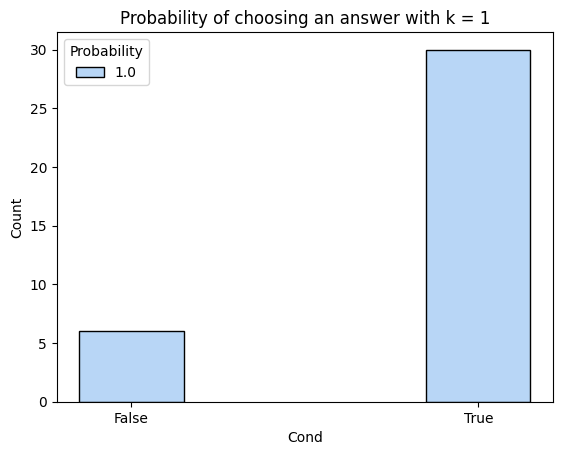

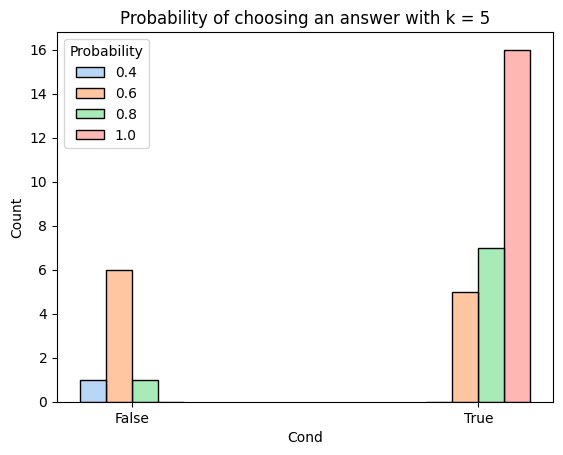

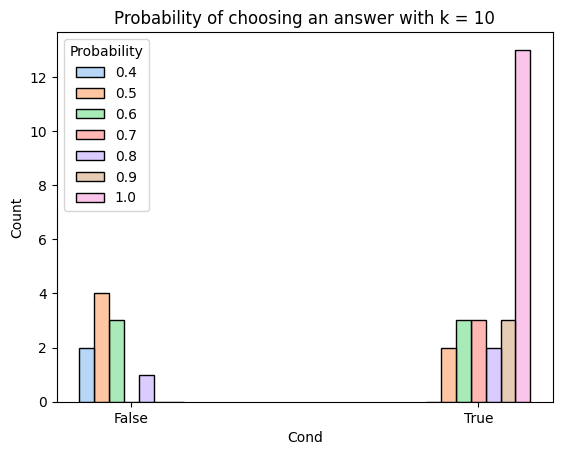

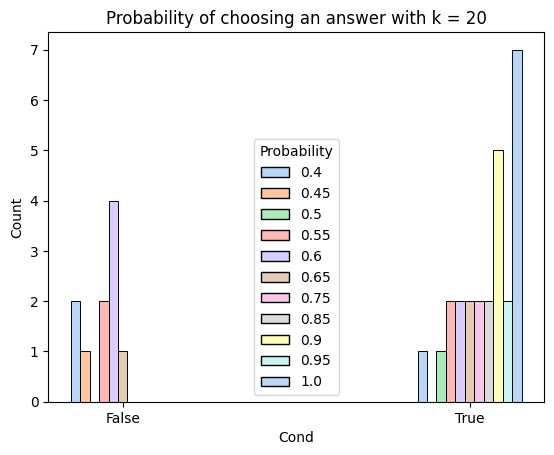

In [29]:
for k in [1,5,10,20]:
    result, K_nearest = KNN(x_train, y_train, x_test, y_test, k)
    k5_prob = result_prob(K_nearest, y_test, result)
    cond = ["True" if result[i]==y_test[i] else "False" for i in range(test_size)]
    probs = pd.DataFrame({"Cond":cond, "Probability":k5_prob})
    sns.histplot(data = probs, x = "Cond", hue = "Probability", palette = "pastel", multiple="dodge", shrink=0.3)
    plt.title(f"Probability of choosing an answer with k = {k}")
    plt.show()

# Metric Learning

# LMNN

In [9]:
from metric_learn import LMNN
x_train_lmnn = []
x_test_lmnn = []
K_ = [1,5,15]
for k_ in K_:
    lmnn = LMNN(k=k_, learn_rate=1e-6, n_components = 2)
    lmnn.fit(x_train, y_train)
    x_train_lmnn.append(lmnn.transform(x_train))
    x_test_lmnn.append(lmnn.transform(x_test))

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_reduced = pca.fit_transform(x_train)

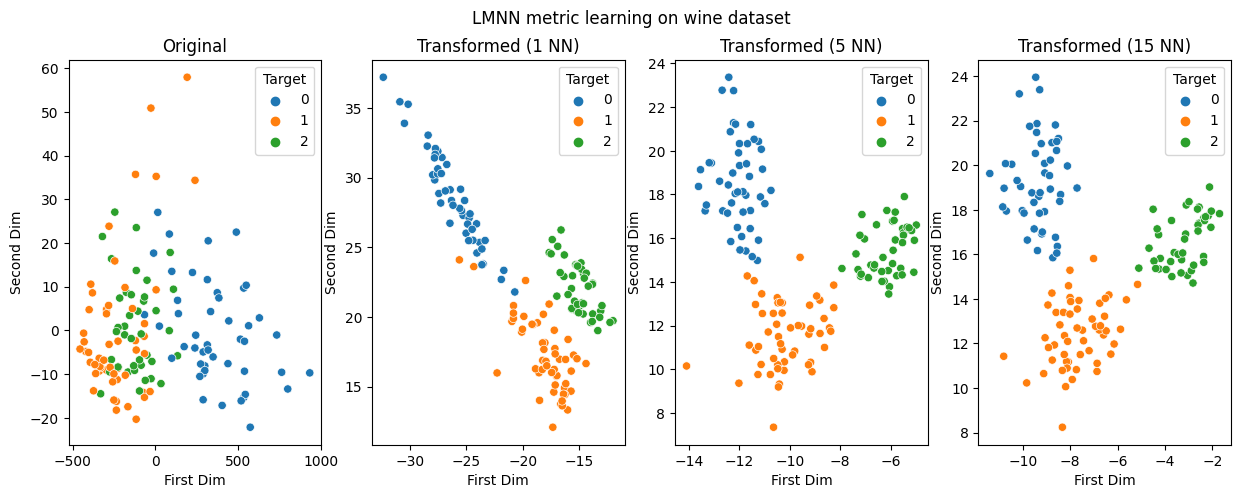

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=False)
fig.suptitle('LMNN metric learning on wine dataset')
sns.scatterplot(ax = axes[0], x = x_train_reduced[:,0], y = x_train_reduced[:,1], hue = y_train, palette = "tab10")
axes[0].legend(title='Target')
axes[0].set_xlabel("First Dim")
axes[0].set_ylabel("Second Dim")
axes[0].set_title(f"Original")
for i in range(3):
    sns.scatterplot(ax = axes[i+1], x = x_train_lmnn[i][:,0], y = x_train_lmnn[i][:,1], hue = y_train, palette = "tab10")
    axes[i+1].legend(title='Target')
    axes[i+1].set_xlabel("First Dim")
    axes[i+1].set_ylabel("Second Dim")
    axes[i+1].set_title(f"Transformed ({K_[i]} NN)")

In [52]:
lmnn = LMNN(k=15)
lmnn.fit(x_train, y_train)
x_train_lmnn = lmnn.transform(x_train)
x_test_lmnn = lmnn.transform(x_test)

In [53]:
best_k = 1
result, K_nearest = KNN(x_train_lmnn, y_train, x_test_lmnn, y_test, best_k)
Score = score(y_test, result)
print(f"LMNN score = {Score*100:0.2f} % for k = {best_k}")
confusion_matrix(y_test, result)

LMNN score = 94.44 % for k = 1
Predictions   0   1  2
Label                 
0            12   0  0
1             1  16  1
2             0   0  6 



# LFDA

In [17]:
from metric_learn import LFDA
x_train_lfda = []
x_test_lfda = []
K_ = [1,5,12]
for k_ in K_:
    lfda = LFDA(k=k_, n_components = 2)
    lfda.fit(x_train, y_train)
    x_train_lfda.append(lfda.transform(x_train))
    x_test_lfda.append(lfda.transform(x_test))

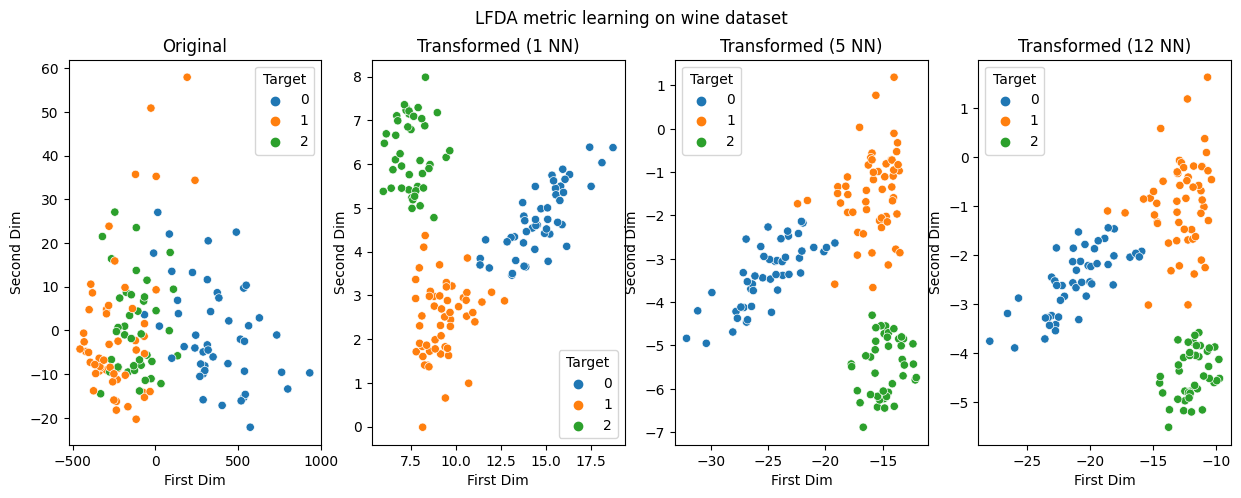

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=False)
fig.suptitle('LFDA metric learning on wine dataset')
sns.scatterplot(ax = axes[0], x = x_train_reduced[:,0], y = x_train_reduced[:,1], hue = y_train, palette = "tab10")
axes[0].legend(title='Target')
axes[0].set_xlabel("First Dim")
axes[0].set_ylabel("Second Dim")
axes[0].set_title(f"Original")
for i in range(3):
    sns.scatterplot(ax = axes[i+1], x = x_train_lfda[i][:,0], y = x_train_lfda[i][:,1], hue = y_train, palette = "tab10")
    axes[i+1].legend(title='Target')
    axes[i+1].set_xlabel("First Dim")
    axes[i+1].set_ylabel("Second Dim")
    axes[i+1].set_title(f"Transformed ({K_[i]} NN)")

In [49]:
lfda = LFDA(k=12)
lfda.fit(x_train, y_train)
x_train_lfda = lfda.transform(x_train)
x_test_lfda = lfda.transform(x_test)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


In [50]:
best_k = 1
result, K_nearest = KNN(x_train_lfda, y_train, x_test_lfda, y_test, best_k)
Score = score(y_test, result)
print(f"LFDA score = {Score*100:0.2f} % for k = {best_k}")
confusion_matrix(y_test, result)

LFDA score = 94.44 % for k = 1
Predictions   0   1  2
Label                 
0            12   0  0
1             1  16  1
2             0   0  6 



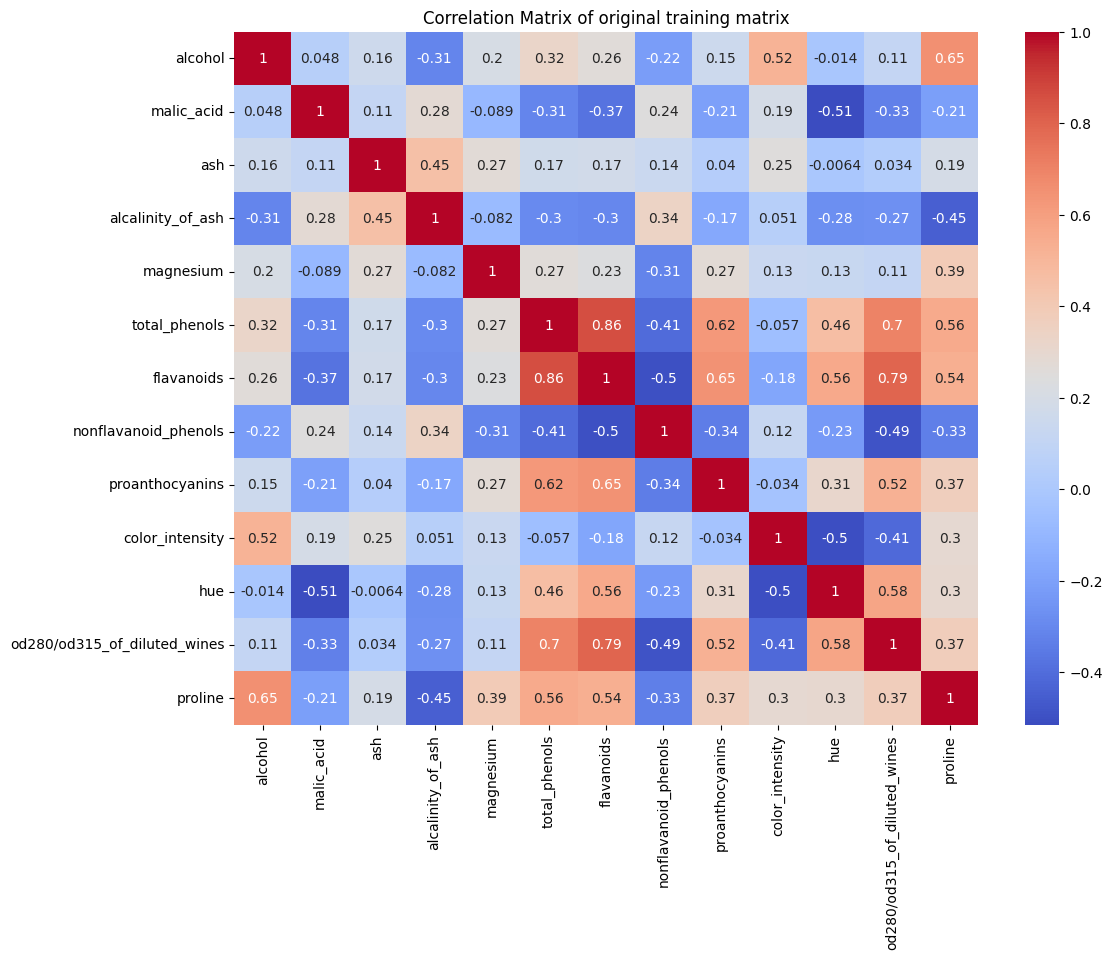

In [43]:
plt.figure(figsize = (12, 9))
sns.heatmap(data = pd.DataFrame(x_train).corr(), annot = True, cmap='coolwarm'
            ,xticklabels=data.feature_names, yticklabels=data.feature_names)
plt.title("Correlation Matrix of original training matrix")
plt.show()

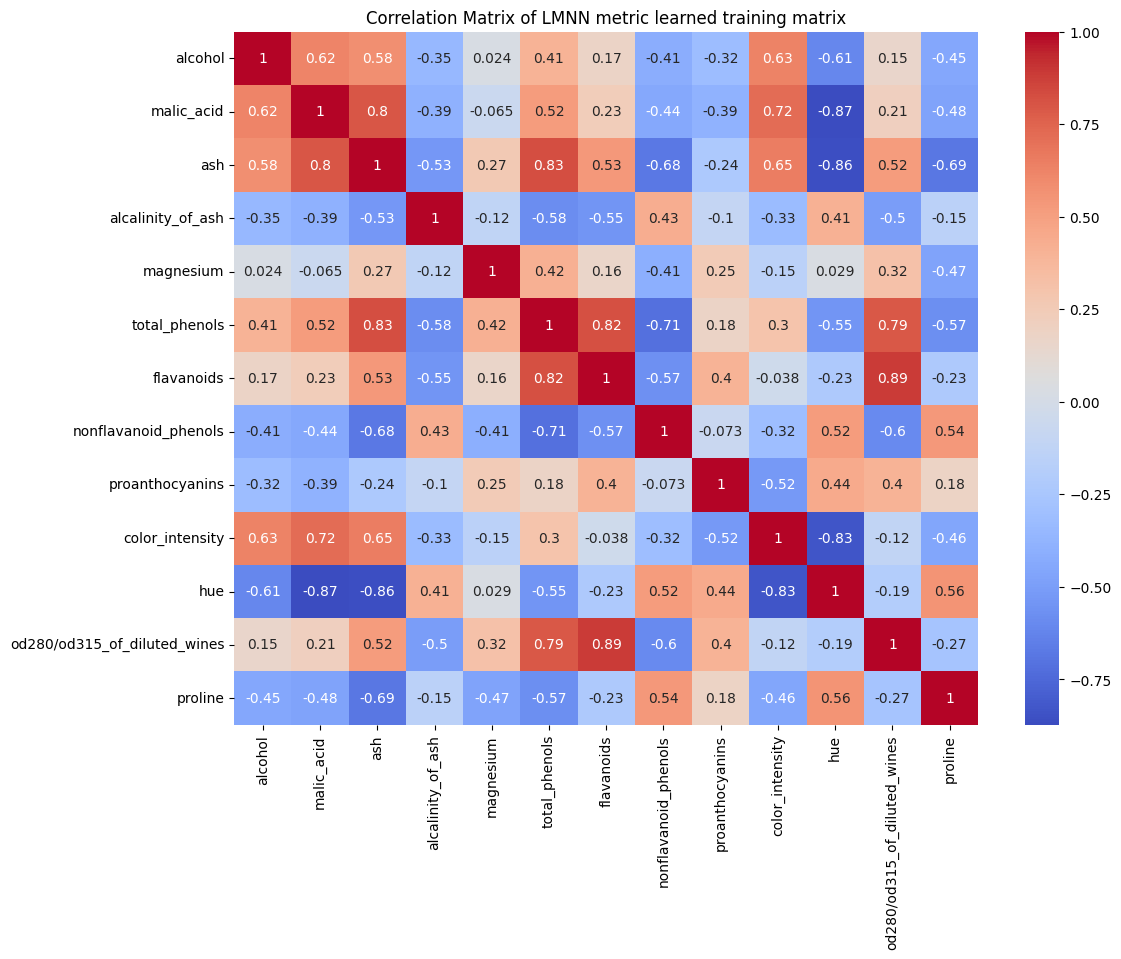

In [54]:
plt.figure(figsize = (12, 9))
sns.heatmap(data = pd.DataFrame(x_train_lmnn).corr(), annot = True, cmap='coolwarm'
            ,xticklabels=data.feature_names, yticklabels=data.feature_names)
plt.title("Correlation Matrix of LMNN metric learned training matrix")
plt.show()

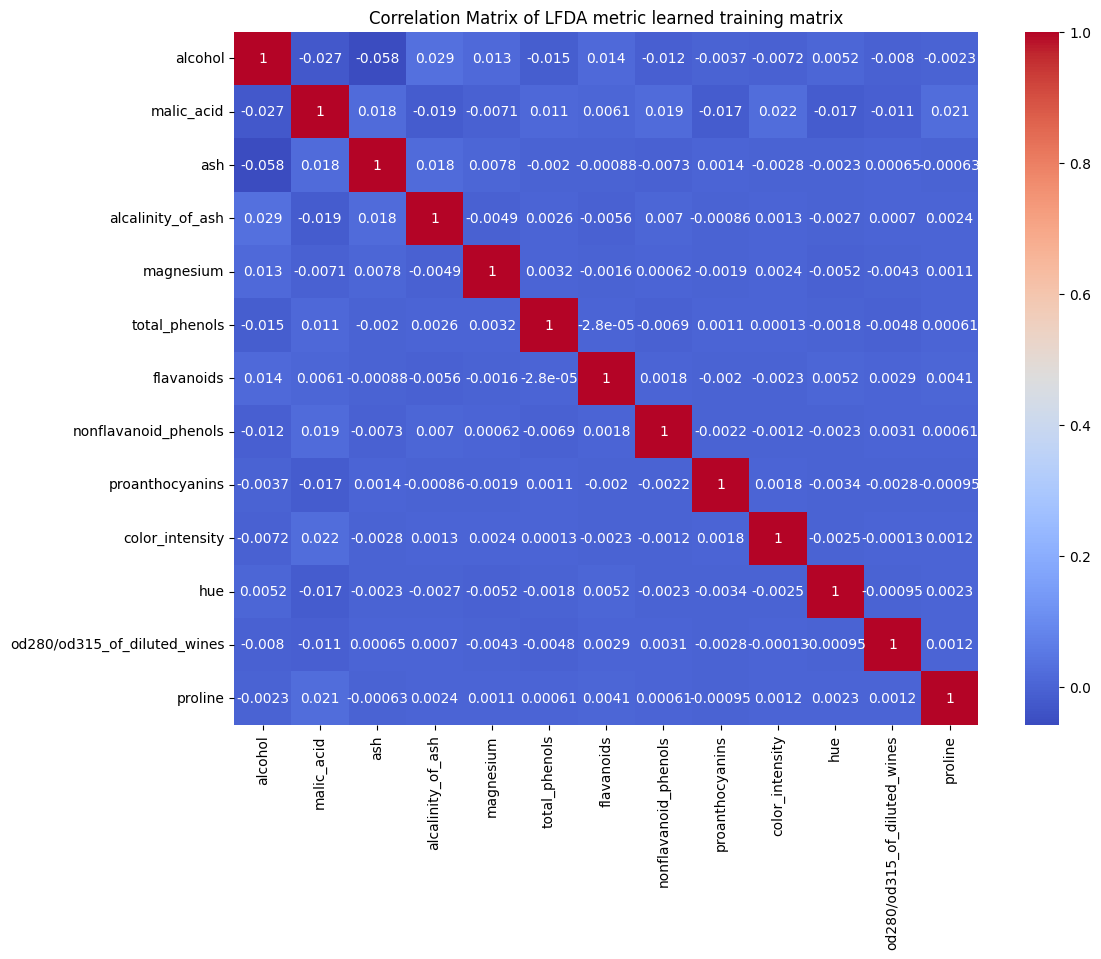

In [51]:
plt.figure(figsize = (12, 9))
sns.heatmap(data = pd.DataFrame(x_train_lfda).corr(), annot = True, cmap='coolwarm'
            ,xticklabels=data.feature_names, yticklabels=data.feature_names)
plt.title("Correlation Matrix of LFDA metric learned training matrix")
plt.show()